In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [136]:
# Loading the csv data to a pandas dataframe
gold_data=pd.read_csv('./gld_price_data.csv')

In [137]:
# Print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [138]:
# Print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [139]:
# Number of rows and columns
gold_data.shape

(2290, 6)

In [140]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [141]:
# Checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [142]:
# Getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [143]:
correlation=gold_data.corr()

C:\Users\power\AppData\Local\Temp\ipykernel_8220\361041759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


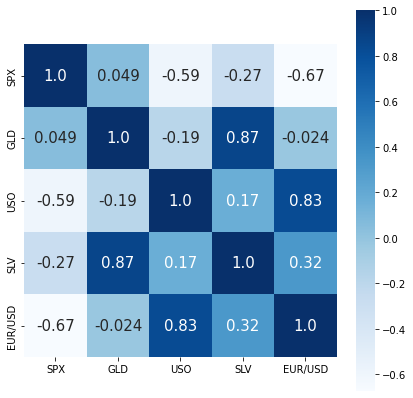

In [144]:
# Constracting a heatmap to undrestand the correlation
plt.figure(figsize=(7,7))
sns.heatmap(correlation,annot=True,square=True,cbar=True,fmt='.2',cmap='Blues',annot_kws={'size':15})
plt.show()

In [145]:
# Correlation values of GLD
print(correlation['GLD'].sort_values(ascending=False))

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64


C:\Users\power\AppData\Local\Temp\ipykernel_8220\2136297255.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


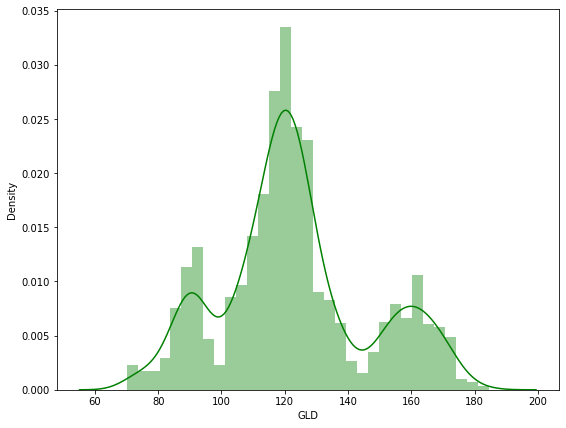

In [146]:
plt.figure(figsize=(9,7))
sns.distplot(gold_data['GLD'],color='green')
plt.show()

C:\Users\power\AppData\Local\Temp\ipykernel_8220\54775874.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['SLV'],color='green')


<AxesSubplot:xlabel='SLV', ylabel='Density'>

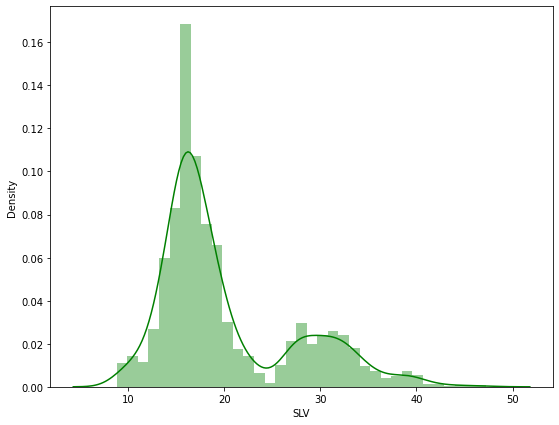

In [147]:
plt.figure(figsize=(9,7))
sns.distplot(gold_data['SLV'],color='green')

C:\Users\power\AppData\Local\Temp\ipykernel_8220\3832427684.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['SPX'],color='green')


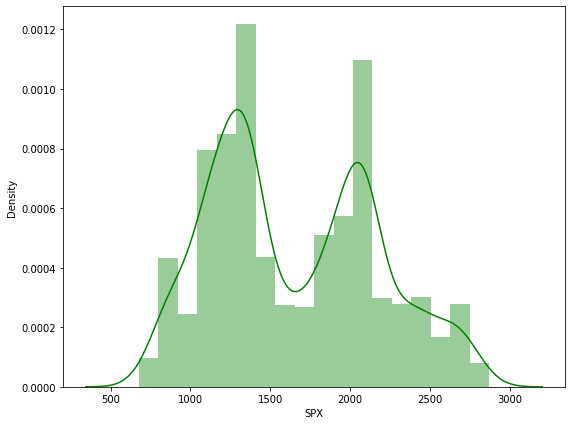

In [148]:
plt.figure(figsize=(9,7))
sns.distplot(gold_data['SPX'],color='green')
plt.show()

C:\Users\power\AppData\Local\Temp\ipykernel_8220\898474248.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['EUR/USD'],color='green')


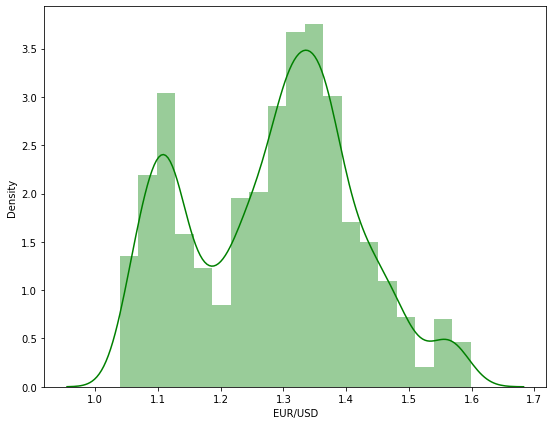

In [149]:
plt.figure(figsize=(9,7))
sns.distplot(gold_data['EUR/USD'],color='green')
plt.show()

C:\Users\power\AppData\Local\Temp\ipykernel_8220\133542130.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['USO'],color='green')


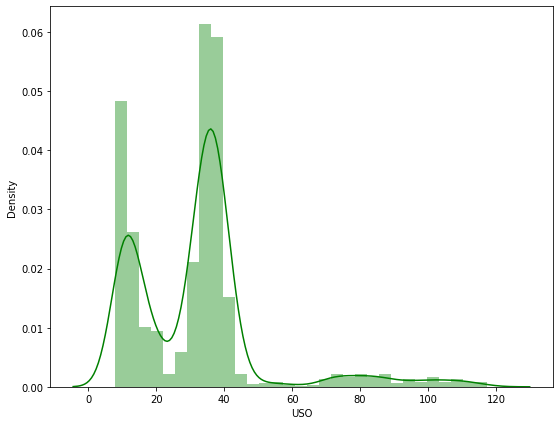

In [150]:
plt.figure(figsize=(9,7))
sns.distplot(gold_data['USO'],color='green')
plt.show()

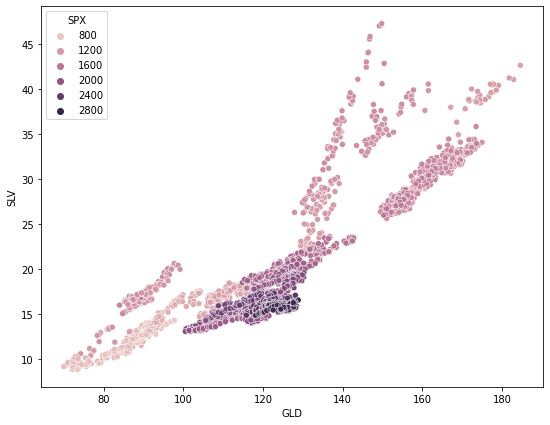

In [151]:
# Data visualization with scatter plot
plt.figure(figsize=(9,7))
sns.scatterplot(data=gold_data,x='GLD',y='SLV',hue='SPX')
plt.show()

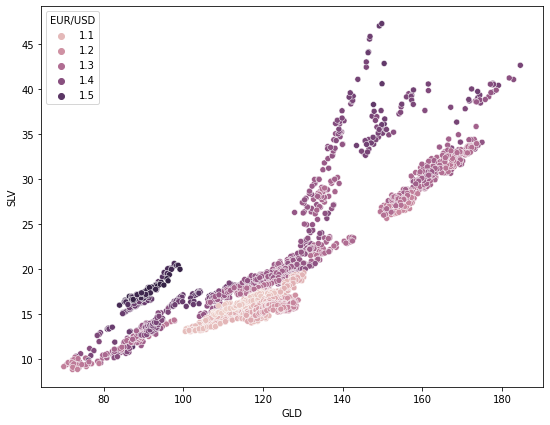

In [152]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=gold_data,x='GLD',y='SLV',hue='EUR/USD')
plt.show()

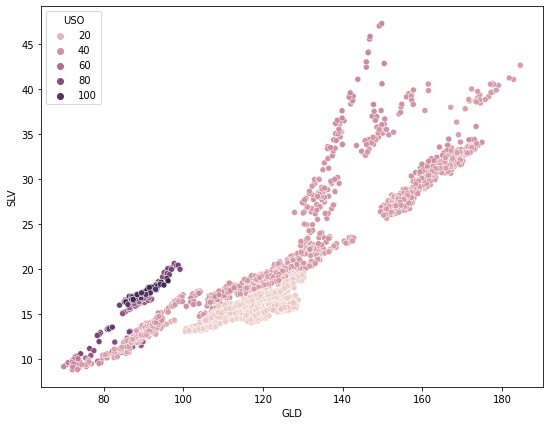

In [153]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=gold_data,x='GLD',y='SLV',hue='USO')
plt.show()

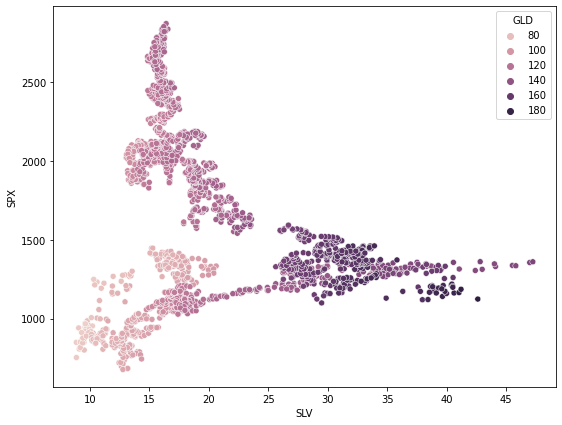

In [154]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=gold_data,x='SLV',y='SPX',hue='GLD')
plt.show()

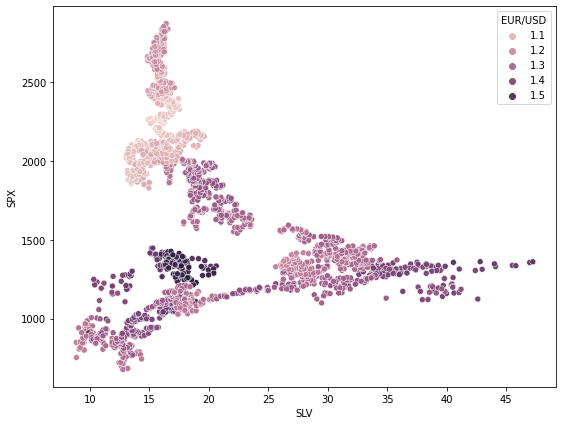

In [155]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=gold_data,x='SLV',y='SPX',hue='EUR/USD')
plt.show()

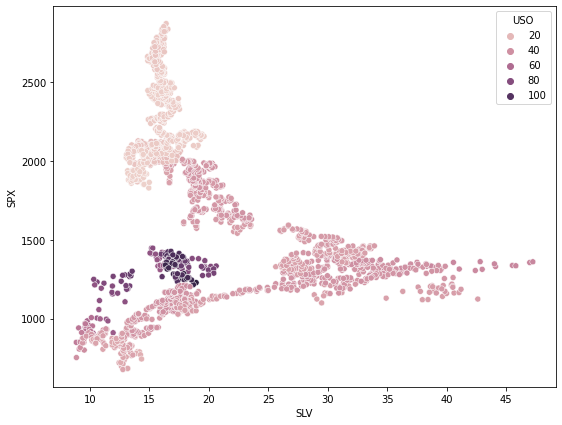

In [156]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=gold_data,x='SLV',y='SPX',hue='USO')
plt.show()

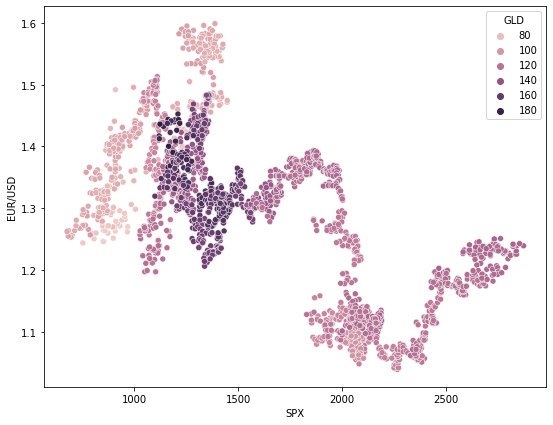

In [157]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=gold_data,x='SPX',y='EUR/USD',hue='GLD')
plt.show()

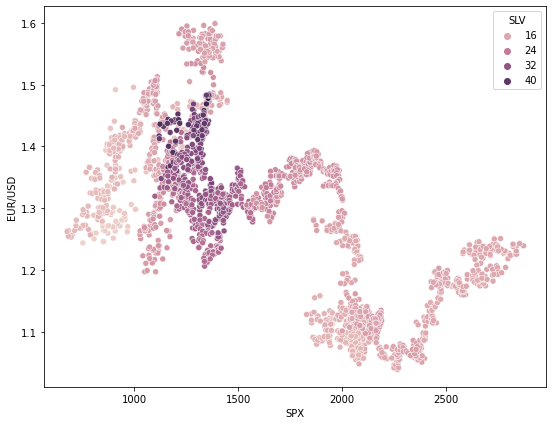

In [158]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=gold_data,x='SPX',y='EUR/USD',hue='SLV')
plt.show()

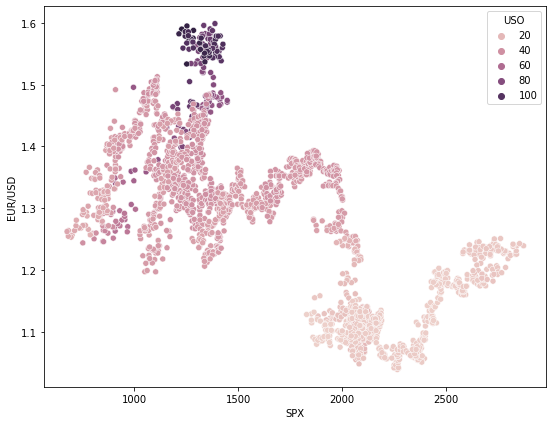

In [159]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=gold_data,x='SPX',y='EUR/USD',hue='USO')
plt.show()

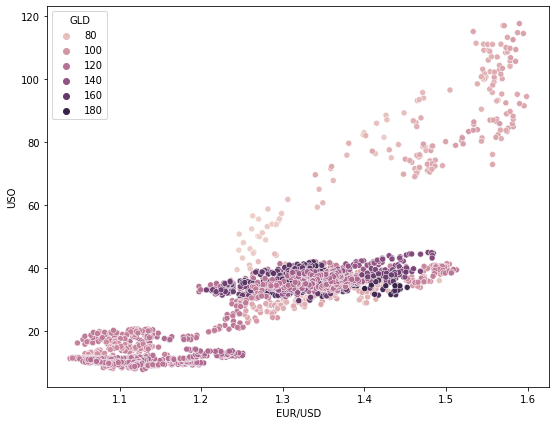

In [160]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=gold_data,x='EUR/USD',y='USO',hue='GLD')
plt.show()

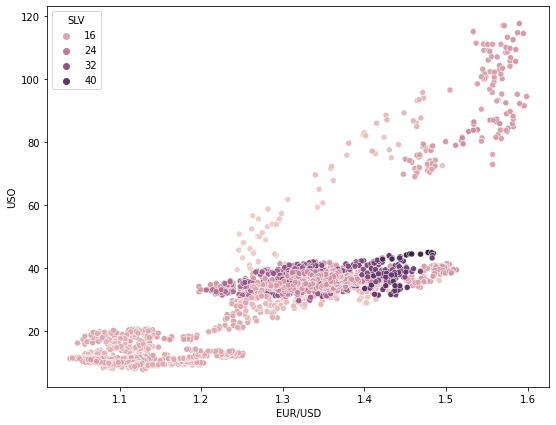

In [161]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=gold_data,x='EUR/USD',y='USO',hue='SLV')
plt.show()

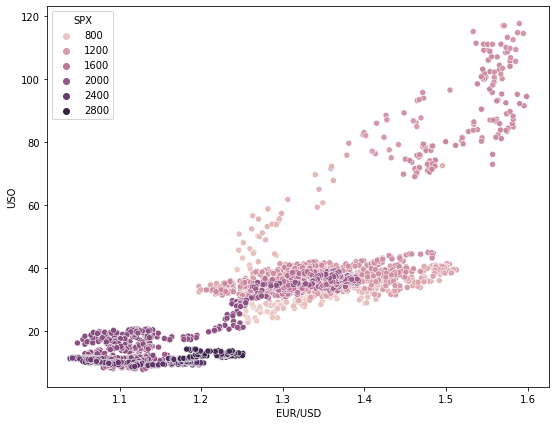

In [162]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=gold_data,x='EUR/USD',y='USO',hue='SPX')
plt.show()

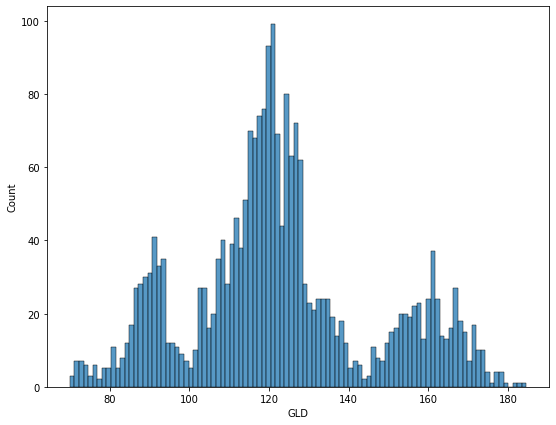

In [163]:
# Data visualization using histplot
plt.figure(figsize=(9,7))
sns.histplot(data=gold_data,x='GLD',bins=100)
plt.show()

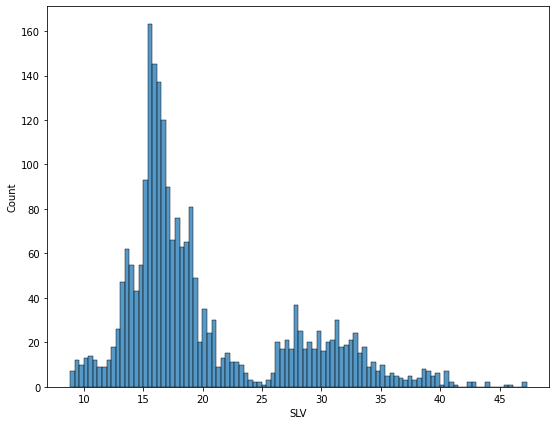

In [164]:
plt.figure(figsize=(9,7))
sns.histplot(data=gold_data,x='SLV',bins=100)
plt.show()

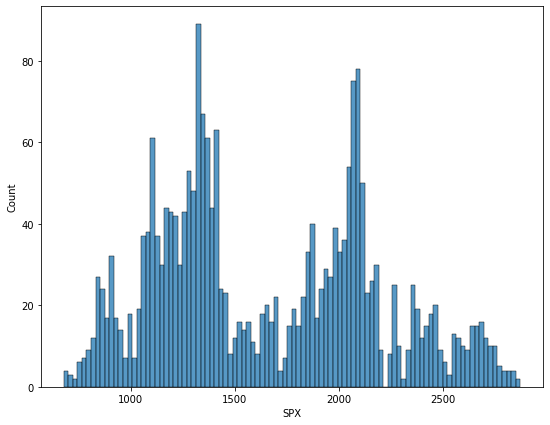

In [165]:
plt.figure(figsize=(9,7))
sns.histplot(data=gold_data,x='SPX',bins=100)
plt.show()

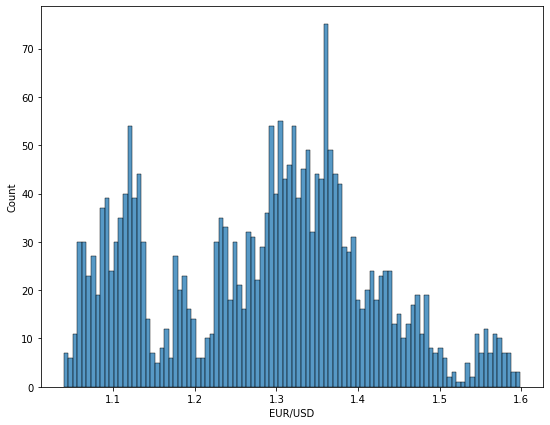

In [166]:
plt.figure(figsize=(9,7))
sns.histplot(data=gold_data,x='EUR/USD',bins=100)
plt.show()

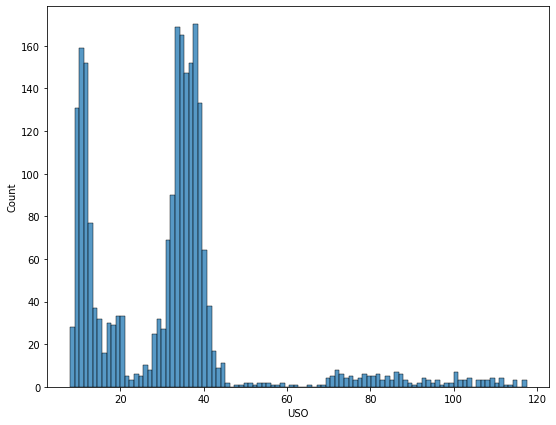

In [167]:
plt.figure(figsize=(9,7))
sns.histplot(data=gold_data,x='USO',bins=100)
plt.show()

In [168]:
# Scaling the data
cols_to_scale=['SLV','SPX','EUR/USD','USO']
scaler=MinMaxScaler()
gold_data[cols_to_scale]=scaler.fit_transform(gold_data[cols_to_scale])

In [169]:
# Splitting the features and target
X=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [170]:
print(X)

           SPX       USO       SLV   EUR/USD
0     0.350870  0.643809  0.164801  0.772924
1     0.350870  0.642896  0.167535  0.777924
2     0.334693  0.633218  0.164462  0.779713
3     0.336765  0.616691  0.161494  0.766862
4     0.324931  0.621804  0.175475  0.925504
...        ...       ...       ...       ...
2285  0.908507  0.055698  0.173392  0.263942
2286  0.920286  0.058528  0.173913  0.260250
2287  0.931796  0.058893  0.179380  0.272811
2288  0.935010  0.058619  0.174694  0.275249
2289  0.933029  0.058855  0.171940  0.255446

[2290 rows x 4 columns]


In [171]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [172]:
# Splitting the data into training data and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [174]:
model=RandomForestRegressor()

In [175]:
param_grid={'n_estimators':[100,120],'max_depth':[2,4],'max_features':['log2','sqrt']}

In [176]:
grid=GridSearchCV(estimator=model,param_grid=param_grid)

In [177]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4], 'max_features': ['log2', 'sqrt'],
                         'n_estimators': [100, 120]})

In [180]:
grid.best_params_

{'max_depth': 4, 'max_features': 'log2', 'n_estimators': 120}

In [182]:
test_data_predictions=grid.predict(X_test)
test_data_predictions[:5]

array([159.21443035,  87.31230176, 115.53426759, 120.29833742,
       118.10704291])

In [184]:
y_test[:5]

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
Name: GLD, dtype: float64

In [186]:
# R squared error
error_score=metrics.r2_score(y_test,test_data_predictions)
print("R squared error is: ",error_score)

R squared error is:  0.9407551954522039


In [187]:
MAE=metrics.mean_absolute_error(y_test,test_data_predictions)
print('Mean Absolute Error is: ',MAE)

Mean Absolute Error is:  4.281253408030615


In [188]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test,test_data_predictions))
print('Root Mean Squared Error is: ',RMSE)

Root Mean Squared Error is:  5.590016735773502


In [189]:
y_test=list(y_test)

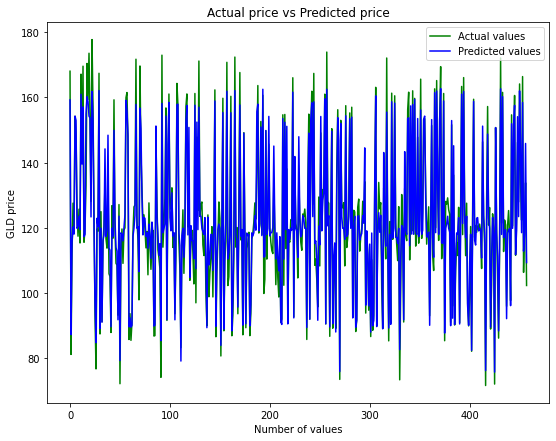

In [190]:
# Compare the actual values and predicted values in a plot
plt.figure(figsize=(9,7))
plt.plot(y_test,color='green',label='Actual values')
plt.plot(test_data_predictions,color='blue',label='Predicted values')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()